###1) Cargar la data

In [ ]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

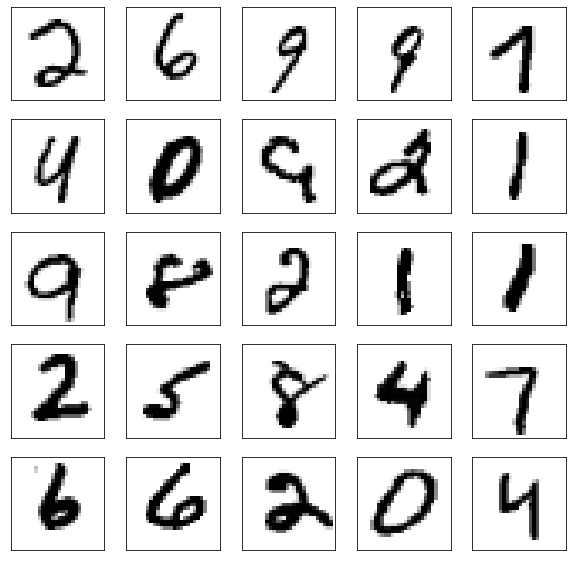

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  #plt.xlabel(text_labels[train_labels[img_index]])

###2) Normalice los datos antes de entrenar y lleve las imágenes a un vector. ¿Que dificultades encontró?

In [ ]:
# Normalizo
train_std = train_images.std(axis = 0)
train_std[train_std == 0] = 1

test_std = test_images.std(axis = 0)
test_std[test_std == 0] = 1

train_images_normalized = np.divide((np.subtract(train_images, train_images.mean(axis=0))), train_std)
test_images_normalized = np.divide((np.subtract(test_images, test_images.mean(axis=0))), test_std)

# Reshape
train_images_normalized_reshaped = train_images_normalized.reshape(train_images_normalized.shape[0], 28 * 28)
test_images_normalized_reshaped = test_images_normalized.reshape(test_images_normalized.shape[0], 28 * 28)

train_images_normalized_reshaped = train_images_normalized_reshaped.astype('float32')
test_images_normalized_reshaped = test_images_normalized_reshaped.astype('float32')

###3) Programar con keras el GD para cada base de datos (dos códigos independientes) usando GPU. Indicar el learning rate, el patience del early stopping. También indicar el riesgo y el accuracy alcanzado tanto para el conjunto de entrenamiento como el de testeo.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=784))
model.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=train_images, y=train_labels, batch_size =60000, epochs=1000,callbacks=[es])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 388ms/step - loss: 3.1139 - accuracy: 0.0596
Epoch 2/1000
1/1 [==============================] - 0s 77ms/step - loss: 1.0949 - accuracy: 0.7176
Epoch 3/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.5821 - accuracy: 0.8345
Epoch 4/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.4954 - accuracy: 0.8573
Epoch 5/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.4555 - accuracy: 0.8663
Epoch 6/1000
1/1 [==============================] - 0s 102ms/step - loss: 0.4291 - a

###4) Mostrar la confusion matrix

Acurracy alcanzado de los datos de testeo:  0.9258


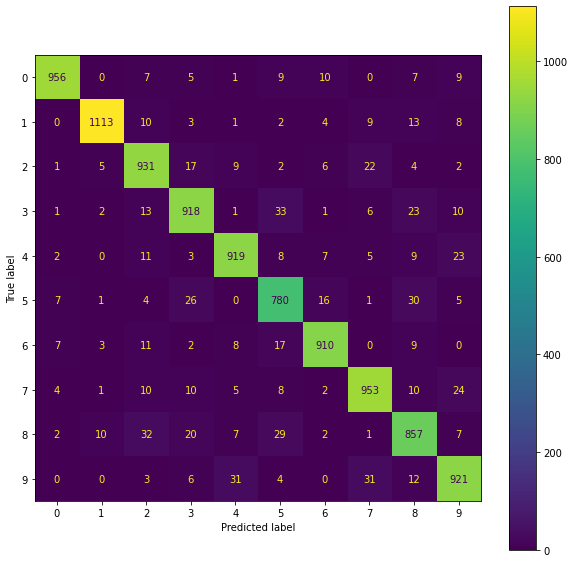

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def clasificar_numero(entrada):
  prediccion = model.predict(entrada)
  arg_max = np.argmax(prediccion, axis=1)
  return arg_max

test_images_predicted = clasificar_numero(test_images)

# Plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(test_images_predicted,test_labels,ax=ax)

# Accuracy alcanzado para los datos de testeo
acc = (test_images_predicted == test_labels).mean()
print("Acurracy alcanzado de los datos de testeo: ", acc)


###Repetir para FASHION-MNIST

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

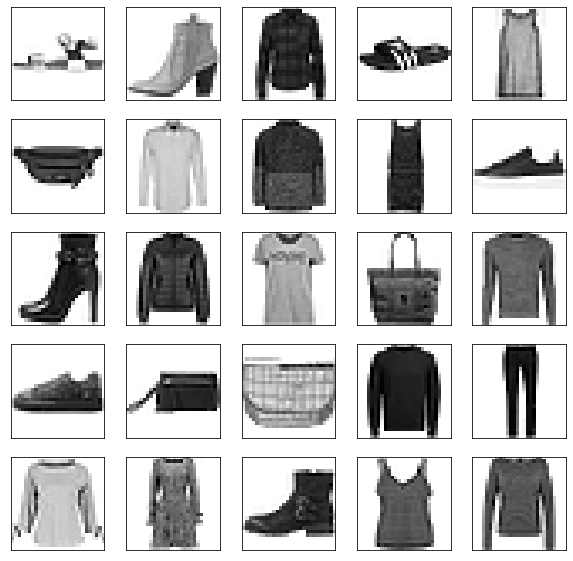

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  #plt.xlabel(text_labels[train_labels[img_index]])

In [ ]:
# Normalizo
train_std = train_images.std(axis = 0)
train_std[train_std == 0] = 1

test_std = test_images.std(axis = 0)
test_std[test_std == 0] = 1

train_images_normalized = np.divide((np.subtract(train_images, train_images.mean(axis=0))), train_std)
test_images_normalized = np.divide((np.subtract(test_images, test_images.mean(axis=0))), test_std)

# Reshape
train_images_normalized_reshaped = train_images_normalized.reshape(train_images_normalized.shape[0], 28 * 28)
test_images_normalized_reshaped = test_images_normalized.reshape(test_images_normalized.shape[0], 28 * 28)


train_images_normalized_reshaped = train_images_normalized_reshaped.astype('float32')
test_images_normalized_reshaped = test_images_normalized_reshaped.astype('float32')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=784))
model.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=train_images_normalized_reshaped, y=train_labels, batch_size =60000, epochs=1000,callbacks=[es])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 353ms/step - loss: 2.7050 - accuracy: 0.1416
Epoch 2/1000
1/1 [==============================] - 0s 80ms/step - loss: 1.8668 - accuracy: 0.3828
Epoch 3/1000
1/1 [==============================] - 0s 79ms/step - loss: 1.5257 - accuracy: 0.4811
Epoch 4/1000
1/1 [==============================] - 0s 83ms/step - loss: 1.3403 - accuracy: 0.5451
Epoch 5/1000
1/1 [==============================] - 0s 78ms/step - loss: 1.2226 - accuracy: 0.5911
Epoch 6/1000
1/1 [==============================] - 0s 79ms/step - loss: 1.1401 - ac

Acurracy alcanzado de los datos de testeo:  0.9258


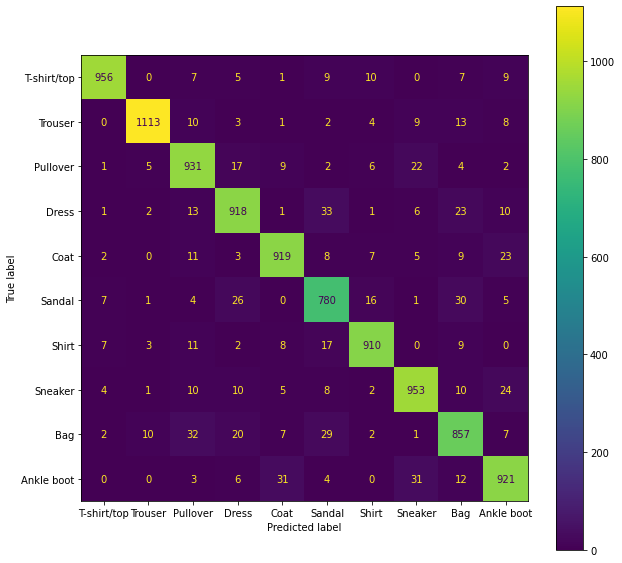

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def clasificar_prenda(entrada):
  prediccion = model.predict(entrada)
  arg_max = np.argmax(prediccion, axis=1)
  return arg_max

test_images_predicted = clasificar_prenda(test_images_normalized_reshaped)

# Plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(test_images_predicted,test_labels,display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],ax=ax)

# Accuracy alcanzado para los datos de testeo
acc = (test_images_predicted == test_labels).mean()
print("Acurracy alcanzado de los datos de testeo: ", acc)
